In [1]:
import json

# 读取数据
with open(r'C:\Users\86189\Desktop\hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 用户节点数据和边关系数据
users = data['nodes']  # 例如: [["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...]
edges = data['edges']  # 例如: [["Yanyan-Wang", "Aarebecca", 25.3], ...]

# 创建邻接字典
adj_dict = {}

# 初始化每个用户的邻接关系
for user, _ in users:
    adj_dict[user] = []

# 填充边关系
for user1, user2, weight in edges:
    adj_dict[user1].append((user2, weight))
    adj_dict[user2].append((user1, weight))

# 打印出每个用户的直接朋友
for user, friends in adj_dict.items():
    print(f"{user}'s friends: {', '.join([friend[0] for friend in friends])}")

# 计算每个用户的度数（朋友数量）
degree_dict = {user: len(friends) for user, friends in adj_dict.items()}

# 排序并输出度数最多的前5个用户
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
top_5_degree_users = sorted_degree[:5]

for user, degree in top_5_degree_users:
    print(f"{user}: {degree} friends")

# 提取影响力分数
influence_dict = {user: influence for user, influence in users}

# 排序并输出影响力最高的前5个用户
sorted_influence = sorted(influence_dict.items(), key=lambda x: x[1], reverse=True)
top_5_influence_users = sorted_influence[:5]

for user, influence in top_5_influence_users:
    print(f"{user}: {influence}")

# 综合影响力和度数
combined_influence = {}

for user in adj_dict:
    degree = degree_dict.get(user, 0)
    influence = influence_dict.get(user, 0)
    combined_score = 0.5 * influence + 0.5 * degree
    combined_influence[user] = combined_score

# 排序并输出综合得分最高的前5个用户
sorted_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)
top_5_combined_users = sorted_combined_influence[:5]

for user, score in top_5_combined_users:
    print(f"{user}: {score}")

# 查找 Yanyan-Wang 的朋友的朋友
friends_of_friends = {}

yanyan_friends = [friend[0] for friend in adj_dict['Yanyan-Wang']]

for friend in yanyan_friends:
    for ffriend, _ in adj_dict[friend]:
        if ffriend != 'Yanyan-Wang' and ffriend not in yanyan_friends:
            if ffriend not in friends_of_friends:
                friends_of_friends[ffriend] = 1
            else:
                friends_of_friends[ffriend] += 1

# 按共同朋友数量排序
sorted_friends_of_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)

for user, common_friends in sorted_friends_of_friends[:5]:
    print(f"Recommended user: {user}, Common friends: {common_friends}")

# 查找 Yanyan-Wang 的边并排序
yanyan_edges = [edge for edge in edges if edge[0] == 'Yanyan-Wang' or edge[1] == 'Yanyan-Wang']
sorted_yanyan_edges = sorted(yanyan_edges, key=lambda x: x[2], reverse=True)

# 找出连接强度最高的5个用户
top_5_strongest_connections = []
for edge in sorted_yanyan_edges[:5]:
    user = edge[1] if edge[0] == 'Yanyan-Wang' else edge[0]
    top_5_strongest_connections.append((user, edge[2]))

for user, strength in top_5_strongest_connections:
    print(f"Recommended user: {user}, Connection strength: {strength}")


Yanyan-Wang's friends: Aarebecca, pomelo-nwu, yangzy0603, tyn1998, yvonneyx, lidongze0629, RackweLLizm, yikenie, yubo0923, Maple0817, wj23027, frank-zsy, andyhuang18, bifenglin
Aarebecca's friends: Yanyan-Wang, pomelo-nwu, yangzy0603, yvonneyx, lidongze0629, tyn1998, RackweLLizm, yikenie, yubo0923, Maple0817, frank-zsy
pomelo-nwu's friends: Yanyan-Wang, Aarebecca, yangzy0603, tyn1998, lidongze0629, yvonneyx, RackweLLizm, yikenie, bifenglin, frank-zsy, yubo0923, wj23027, andyhuang18, Maple0817, will-ww, zhicheng-ning, PureNatural, xiaoya-yaya, xgdyp, longyanz, Zzzzzhuzhiwei, birdflyi, lhbvvvvv, zhaosj975
tyn1998's friends: andyhuang18, pomelo-nwu, frank-zsy, wj23027, bifenglin, Yanyan-Wang, will-ww, Zzzzzhuzhiwei, lhbvvvvv, zhicheng-ning, PureNatural, yangzy0603, xgdyp, stevending1st, wxharry, Aarebecca, birdflyi, xiaoya-yaya, pranavshuklaa, lidongze0629, yvonneyx, stealth-bombeer, RackweLLizm, yikenie, Vlad116, longyanz, zhaosj975, yubo0923, Maple0817, kunal8411
frank-zsy's friends: ty

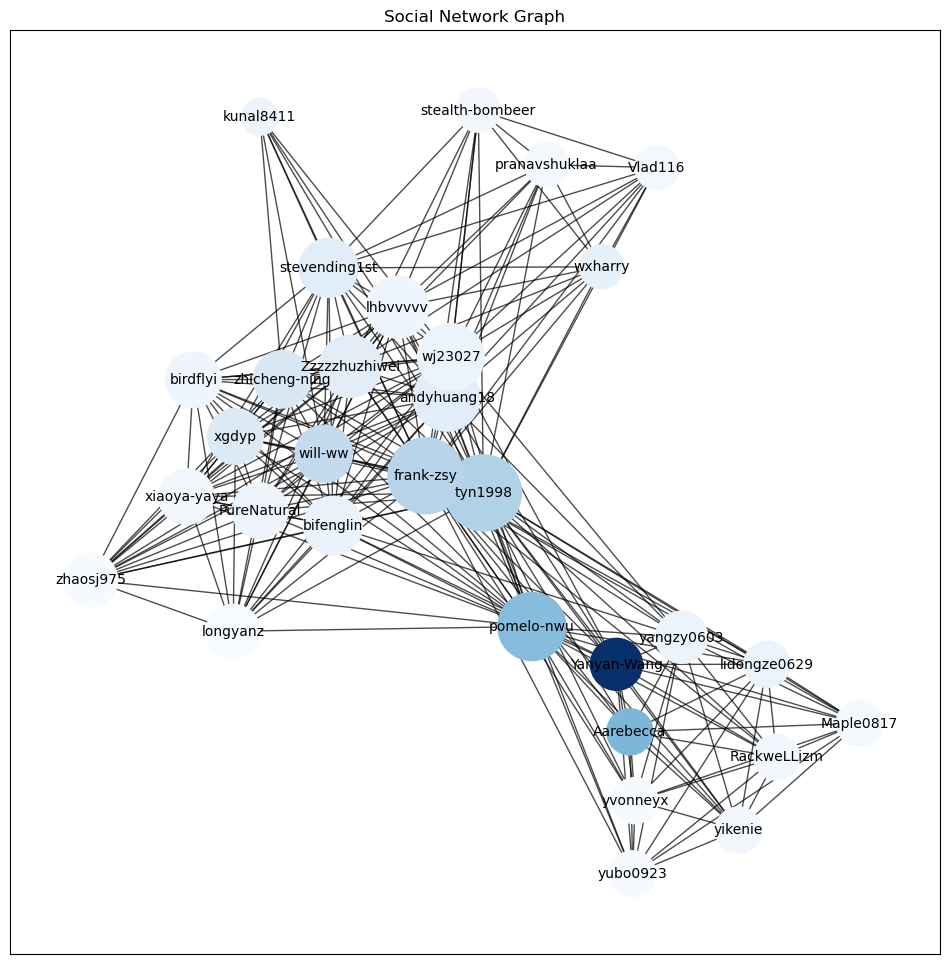

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点和边
for user, influence in users:
    G.add_node(user, size=len(adj_dict[user]), influence=influence)

for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)

# 设置节点大小（度数）和颜色（影响力）
node_sizes = [G.nodes[node]['size'] * 100 for node in G]
node_colors = [G.nodes[node]['influence'] for node in G]

# 绘制图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Social Network Graph')
plt.show()
